### import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## EDA

In [2]:
df=pd.read_csv('/kaggle/input/customer-segmentation/Mall_Customers.csv',index_col='CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of CustomerID
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 200, dtype: bool>

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
gender=df.groupby(df['Gender']).count()
gender

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,112,112,112
Male,88,88,88


In [7]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [8]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


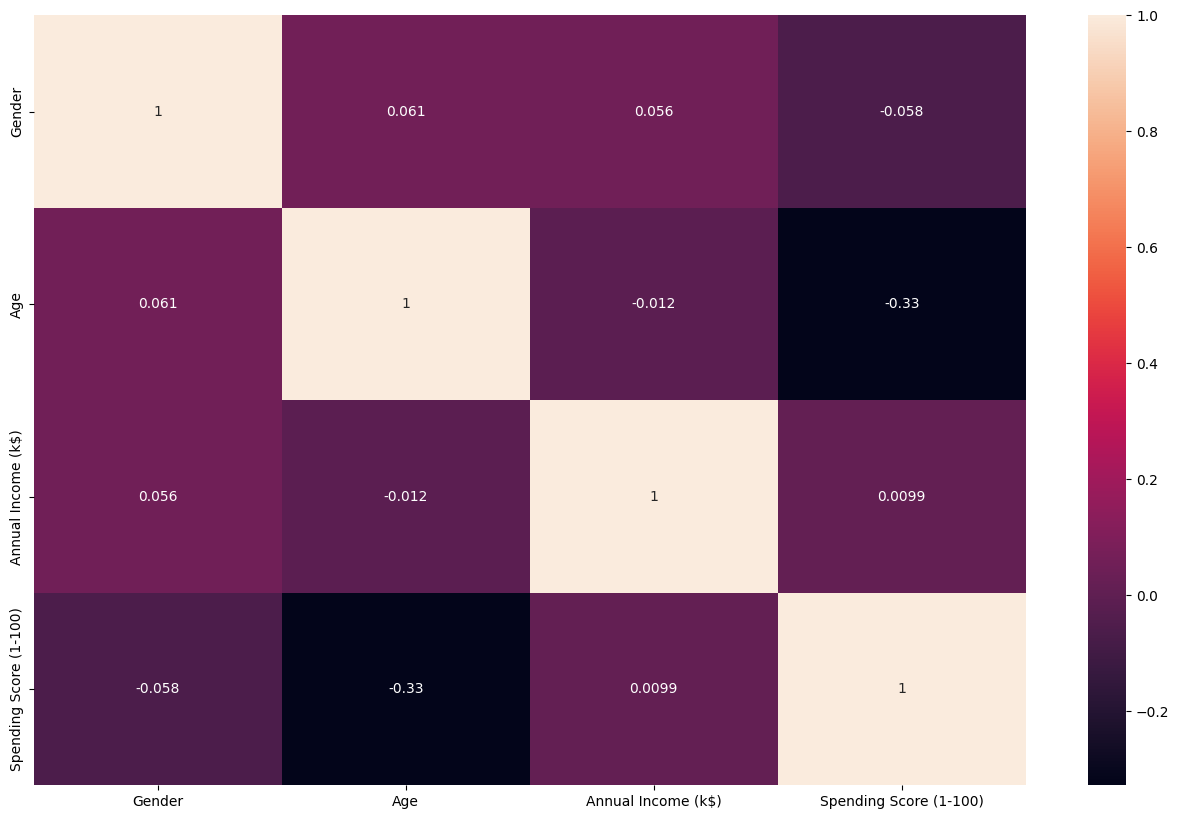

In [9]:
plt.figure(figsize=(16, 10))

sns.heatmap(df.corr(), annot=True)

plt.show()

In [10]:
# How many the gender
gen=df['Gender'].value_counts()
gen

Gender
0    112
1     88
Name: count, dtype: int64

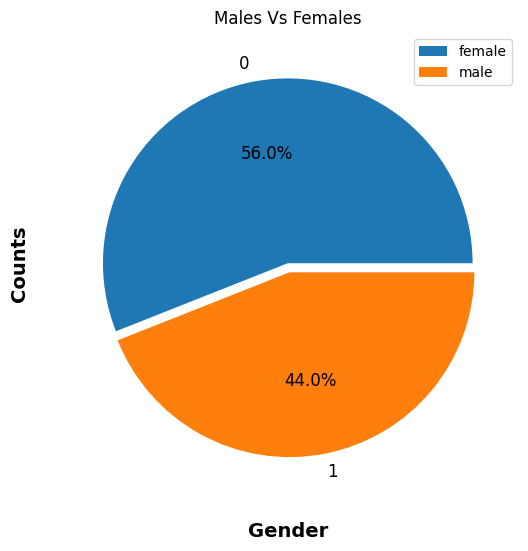

In [11]:
plt.figure(figsize = (20, 6))
explode = (0, 0.05)
gen.plot(kind = 'pie', fontsize = 12,style='_classic_test_patch', explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['female','male'], loc = "best")
plt.show()

In [12]:
most_5_ages_indata=df['Age'].value_counts().head()
most_5_ages_indata

Age
32    11
35     9
19     8
31     8
30     7
Name: count, dtype: int64

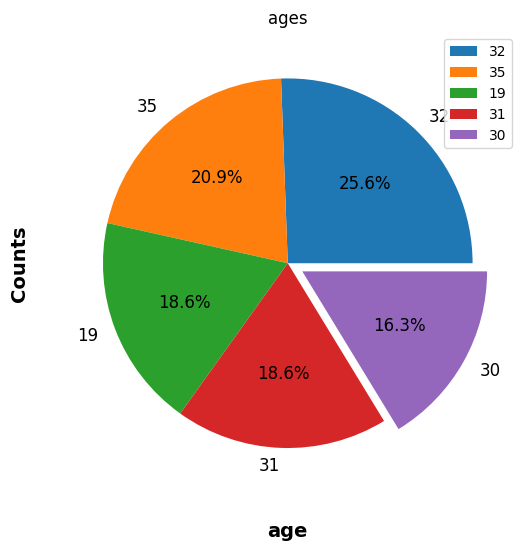

In [13]:
plt.figure(figsize = (20, 6))
explode = (0,0,0,0,0.09)
most_5_ages_indata.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('ages')
plt.xlabel('age', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = most_5_ages_indata.index, loc = "best")
plt.show()

In [14]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
# the most 5 ages get incomes
ac=df['Age'][df['Annual Income (k$)'] > 60].value_counts().head()
ac

Age
32    9
19    5
38    5
36    5
30    5
Name: count, dtype: int64

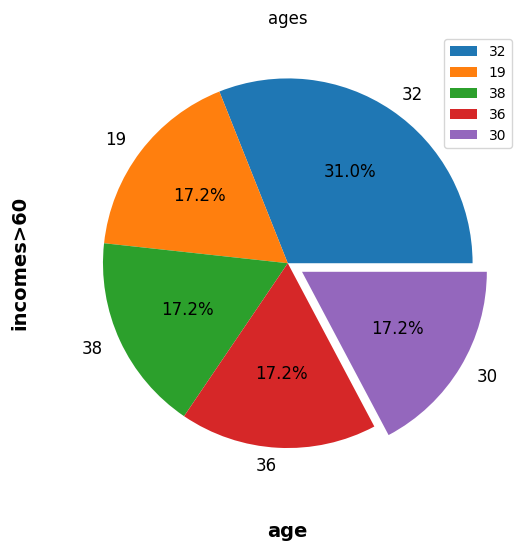

In [16]:
plt.figure(figsize = (20, 6))
explode = (0,0,0,0,0.09)
ac.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('ages')
plt.xlabel('age', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('incomes>60', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ac.index, loc = "best")
plt.show()

In [17]:
# the most 5 ages spend
ms=df['Age'][df['Spending Score (1-100)']>60].value_counts().head()
ms

Age
32    8
30    7
35    6
31    5
29    4
Name: count, dtype: int64

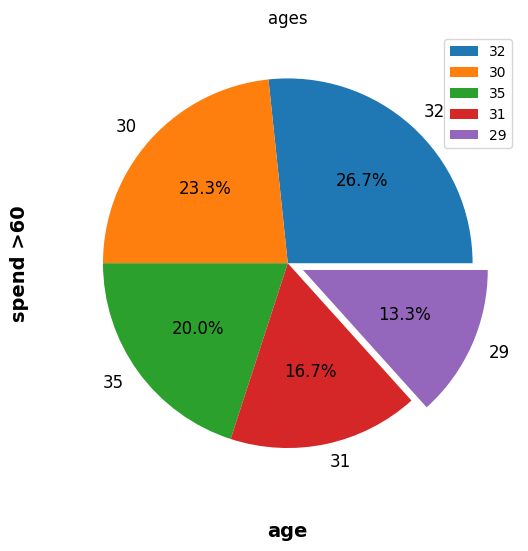

In [18]:
plt.figure(figsize = (20, 6))
explode = (0,0,0,0,0.09)
ms.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('ages')
plt.xlabel('age', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('spend >60', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ms.index, loc = "best")
plt.show()

In [19]:
# the most 5 gender incomes
gm=df['Gender'][df['Annual Income (k$)'] > 60].value_counts().head()
gm

Gender
0    53
1    49
Name: count, dtype: int64

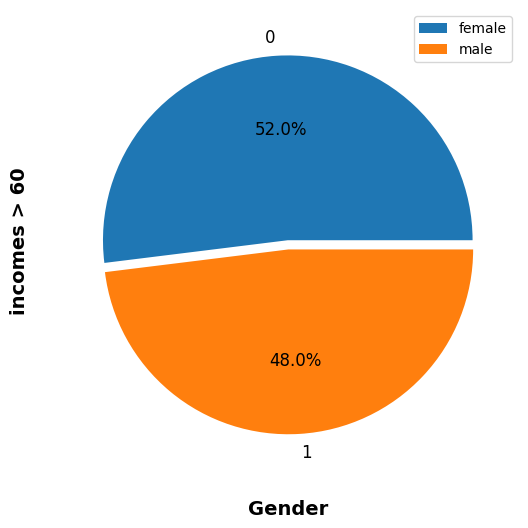

In [20]:
plt.figure(figsize = (20, 6))
explode = (0, 0.05)
gm.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('incomes > 60', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['female','male'], loc = "best")
plt.show()

In [21]:
# the most 5 gender spend
gs=df['Gender'][df['Spending Score (1-100)'] > 60].value_counts().head()
gs

Gender
0    35
1    27
Name: count, dtype: int64

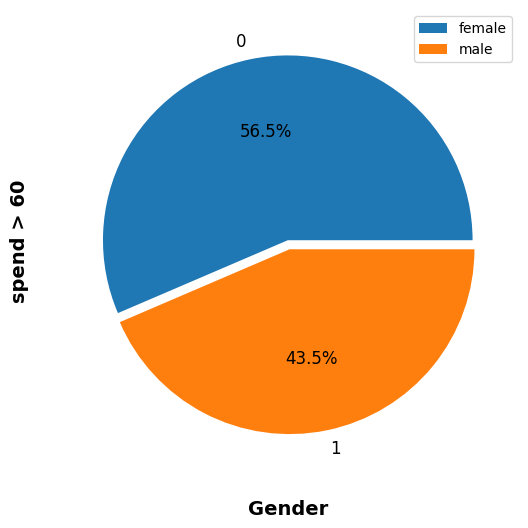

In [22]:
plt.figure(figsize = (20, 6))
explode = (0, 0.05)
gs.plot(kind = 'pie', fontsize = 12,explode = explode, autopct = '%.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('spend > 60', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = ['female','male'], loc = "best")
plt.show()

## Data scaling

In [23]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [24]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

## Elbow plot

In [25]:
cc=[]
for i in range(1,20):
    km=KMeans(n_clusters=i,random_state=42,n_init=10,)
    km.fit(X)
    cc.append(km.inertia_)
cc    

[23.040720326039906,
 13.993505283127977,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.098385141882586,
 2.624103948396721,
 2.2180573120830713,
 1.8734346678670708,
 1.6557947221391276,
 1.4896511939742232,
 1.2954575708508718,
 1.160155113233085,
 1.0667158418845402,
 0.9881170081775976,
 0.9078471798920134,
 0.8087816117589508,
 0.7358610663995749,
 0.7278393639338334]

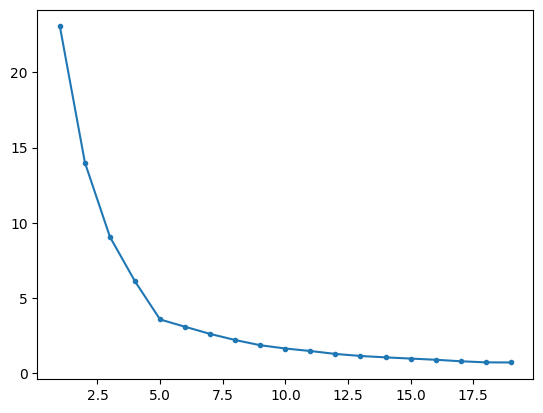

In [26]:
plt.plot(range(1,20),cc,marker='.')

## model

In [27]:
km=KMeans(n_clusters=5,n_init=10)
km.fit(X)

KMeans(n_clusters=5, n_init=10)

In [28]:
pred=km.fit_predict(X)
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [29]:
silhouette_score(X, pred)

0.5602436353739457

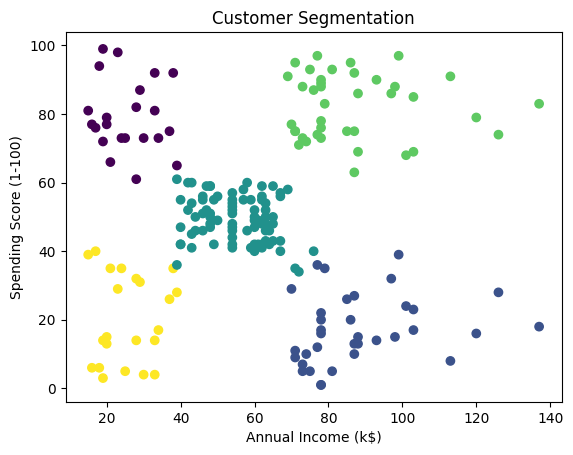

In [30]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=pred)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()